<a href="https://colab.research.google.com/github/SebastianSasaki/cc41_tf_201910349_201915516_201910081_202117686_201917229/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import graphviz as gv #Graficos
import numpy as np
import heapq as hq
import pandas as pd #Leer CSV
import matplotlib.pyplot as plt # Gragicos final
import math as math #Operaciones matematicas

def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

# Stores (Almacenes)

In [ ]:
coords_str = pd.read_csv("almacenes.csv")   #AQUI SE LEE EL CSV DE LOS ALMACENES
coords_str #SE LOS GUARDA EN LA VARIABLE

In [ ]:
coord_sx = coords_str['coordenada X']   
coord_sy = coords_str['coordenada Y']
stores = []


for i in range(len(coord_sx)):
  stores.append([coord_sx[i], coord_sy[i]])

stores

#  Delivery Points (Puntos de entrega)

In [ ]:
coords_dp = pd.read_csv("puntos_entrega.csv")
coords_dp

In [ ]:
coord_dx = coords_dp['coordenada X']
coord_dy = coords_dp['coordenada Y']
delivery_points = []

for i in range(len(coord_dx)):
  delivery_points.append([coord_dx[i], coord_dy[i]])

delivery_points


## REPRESENTACIÓN 1


In [ ]:
#Sebastian Gonzales 
NS = len(stores)
NDP = len(delivery_points)
Total = 1000000 - (NS+NDP+1)
print(Total)

arr = []
for _ in range(Total):
  arr.append([0]*3)

#ALMACENES
coord_sx = coords_str['coordenada X']   
coord_sy = coords_str['coordenada Y']

#DELIVERY POINTS
coord_dx = coords_dp['coordenada X']
coord_dy = coords_dp['coordenada Y']


#1's para Storages
for i in range(len(coord_sx)):
  arr.append([coord_sx[i], coord_sy[i], 1])


#-1's para Delivery Points
for i in range(len(coord_dx)):
  arr.append([coord_dx[i], coord_dy[i], -1] )

arr

# REPRESENTACION 3

In [ ]:
def toPosition(x, y, n):
  return x + y*n;

def adjacents(x, y, n, st, dp):
  dir = [-1]*4
  coords = [[x-1, y],[x, y-1],[x+1, y],[x, y+1]]
  for i, c in enumerate(coords):
    if c in st or c in dp:
      dir[i] = toPosition(c[0], c[1], n)
  return dir

In [ ]:
def makeAdjList(st, dp, n):
  ls = []
  for x in range(n):
    for y in range(n):
      tp = 0
      if [x,y] in st:
        tp = 1        
      if [x,y] in dp:
        tp = 2
      directions = adjacents(x, y, n, st, dp)
      ls.append([tp,[x,y], directions])
  return ls

#REPRESENTACION 4

In [ ]:
def toPosition(x, y, n):
  return x + y*n;

def adjacents(x, y, n):
  dir = []
  coords = [[x, y-1],[x-1, y],[x+1, y],[x, y+1]]
  for c in coords:
    if c[0] != -1 and c[0] != n and c[1] != -1 and c[1] != n:
      dir.append(toPosition(c[0], c[1], n))
  return dir

In [ ]:
# st = data almacenes, sp = data puntos de entrega
# n = tamaño de la matriz cuadrada
def get_ls(st, dp, n):
  ls = []
  locals = []
  for y in range(n): #Caso optimizado -> Y menor - al Y Mayor
    for x in range(n): 
      tp = 0      
      if [x,y] in st:
        tp = 1        
      if [x,y] in dp:
        tp = 2
      ls.append(adjacents(x, y, n))
      locals.append(tp)
  return ls, locals

## ZONA DE PRUBAS

In [ ]:
import random as rd

points = []

while len(points) < 15:
  x = rd.randint(0,5)
  y = rd.randint(0,5)
  if [x, y] not in points:
    points.append([x, y])

In [ ]:
entregas = points[0:5]
almacenes = points[5:]

In [ ]:
data_test = [[9,10], [17,18], [4,12], [1,2], [9,11]]

In [ ]:
st = [[1,5], [1,4], [2,6], [3,8], [4,8], [7,2], [8,3]]
dp = [[1,1], [1,3], [3,4], [4,5], [5,2], [9,9]]

In [ ]:
import random as rd

points = []

while len(points) < 1500:
  x = rd.randint(0,100)
  y = rd.randint(0,100)
  if [x, y] not in points:
    points.append([x, y])

entregas = points[0:1000]
almacenes = points[1000:]

In [ ]:
makeAdjList(almacenes, entregas, 100)

In [ ]:
almac = [[0,0],[2,1]]
pts_entreg = [[1,0],[0,2]]

ls,loc = get_ls(almac, pts_entreg, 3)

print(ls)
print(loc)

[[1, 3], [0, 2, 4], [1, 5], [0, 4, 6], [1, 3, 5, 7], [2, 4, 8], [3, 7], [4, 6, 8], [5, 7]]
[1, 2, 0, 0, 0, 1, 2, 0, 0]


## REPRESENTACIÓN GRAFICA (Hito 2 - Dijkstra)

In [ ]:
def toListWithCosts(G):
  new_list = []
  for c in G:
    l = []
    for n in c:
      l.append((n,1))
    new_list.append(l)
  return new_list

In [ ]:
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [None]*n
  cost = [math.inf]*n
  cost[s] = 0
  queue = [(0, s)]
  while queue:
    g_u, u = hq.heappop(queue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        f = g_u + w
        if f < cost[v]:
          cost[v] = f
          path[v] = u
          hq.heappush(queue, (f, v))

  return path, cost

In [ ]:
almac = [[0,0],[2,1]]
pts_entreg = [[1,0],[0,2]]

ls, loc = get_ls(almac, pts_entreg, 4)
G = toListWithCosts(ls)
print(G)

[[(1, 1), (4, 1)], [(0, 1), (2, 1), (5, 1)], [(1, 1), (3, 1), (6, 1)], [(2, 1), (7, 1)], [(0, 1), (5, 1), (8, 1)], [(1, 1), (4, 1), (6, 1), (9, 1)], [(2, 1), (5, 1), (7, 1), (10, 1)], [(3, 1), (6, 1), (11, 1)], [(4, 1), (9, 1), (12, 1)], [(5, 1), (8, 1), (10, 1), (13, 1)], [(6, 1), (9, 1), (11, 1), (14, 1)], [(7, 1), (10, 1), (15, 1)], [(8, 1), (13, 1)], [(9, 1), (12, 1), (14, 1)], [(10, 1), (13, 1), (15, 1)], [(11, 1), (14, 1)]]


[1, 5, 1, 2, 5, None, 5, 6, 4, 5, 6, 7, 8, 9, 10, 11]
[2, 1, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3, 3, 2, 3, 4]


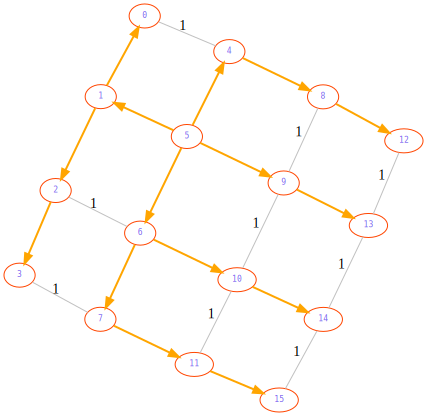

In [ ]:
path, cost = dijkstra(G, 5)
print(path[:40])
print(cost[:40])
# path = [None, 0, None, 0, None, None, 3, None, None] -> 0
# path = [None, 2, 5, 4, 5, None, 3, None, None]       -> 5
adjlShow(G, weighted=True, path=path)

# Dijkstra Alternativo

In [ ]:
def dijkstraAlt(G, L, s):
  n = len(G)
  visited = [False]*n
  path = [None]*n
  cost = [math.inf]*n
  cost[s] = 0
  queue = [(0, s)]
  while queue:
    g_u, u = hq.heappop(queue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        f = g_u + w
        if f < cost[v]:
          cost[v] = f          
          path[v] = u
          hq.heappush(queue, (f, v))

  min_path = [None]*n
  for i, v in enumerate(L):
      if v == 2:
        min_path[i] = path[i]
        m = path[i]
        while m != s:          
          min_path[m] = path[m]
          m = path[m]

  return min_path, cost

In [ ]:
almac = [[0,0],[2,1]]
pts_entreg = [[1,0],[0,2]]

ls, loc = get_ls(almac, pts_entreg, 3)
G = toListWithCosts(ls)
G, loc

([[(1, 1), (3, 1)],
  [(0, 1), (2, 1), (4, 1)],
  [(1, 1), (5, 1)],
  [(0, 1), (4, 1), (6, 1)],
  [(1, 1), (3, 1), (5, 1), (7, 1)],
  [(2, 1), (4, 1), (8, 1)],
  [(3, 1), (7, 1)],
  [(4, 1), (6, 1), (8, 1)],
  [(5, 1), (7, 1)]],
 [1, 2, 0, 0, 0, 1, 2, 0, 0])

[None, 2, 5, 4, 5, None, 3, None, None]
[3, 2, 1, 2, 1, 0, 3, 2, 1]


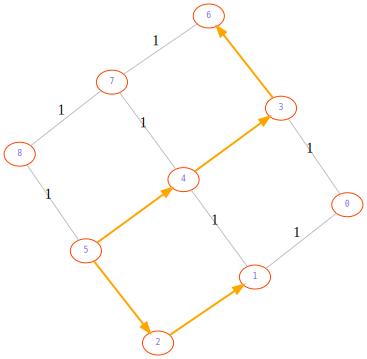

In [ ]:
path, cost = dijkstraAlt(G, loc, 5)
print(path)
print(cost)
# path = [None, 0, None, 0, None, None, 3, None, None] -> 0
# path = [None, 2, 5, 4, 5, None, 3, None, None]       -> 5
adjlShow(G, weighted=True, path=path)

# Hito 3

In [ ]:
# Fuerza Bruta
def distance(st, dev):
  return abs(st[0]-dev[0])  + abs(st[1]-dev[1])


def clustering(almacenes, pnts_entrega):
  clusters = []

  for points in pnts_entrega:
    store = []
    a = math.inf
    x = []
    for strs in almacenes:      
      b = distance(points, strs) 
      if b < a:
        a = b
        x = points
    
    store.append(x)
    clusters.append(store)

BFS(Sebastian Gonzales)

In [ ]:
def bfs(G, s):
  n = len(G)
  visited = [False]*n
  parent = [None]*n
  queue = [s]
  visited[s] = True

  while queue:
    u = queue.pop(0)
    for v in G[u]:
      if not visited[v]:
        visited[v] = True
        parent[v] = u
        queue.append(v)

  return parent
  

In [ ]:
def bfs2(G, s):
  n = len(G)          #2
  visited = [False]*n #1
  parent = [None]*n   #1
  queue = [s]         #1
  visited[s] = True   #2
  count = 0
  


  while queue:              #V * (        ---------------------->  O(V)
    u = queue.pop(0)          #2 +
    for v in G[u]:            #A (        ---------->A(6)--------> O(A)
      if not visited[v]:          #1 + (
        visited[v] = True           #2
        parent[v] = u               #2
        queue.append(v)             #1))
      #for n in visited:                                 # En caso hallan muchos puntos de entrega como en nuestro caso se debe iterar la verificacion
      if (visited[3] == True and visited[9] == True ):   # Verifica que se hallan visitado los vertices de puntos de entrega
        return parent

  #Por lo cual :O(V+A)

  return parent

Jorge Sánchez

In [ ]:
# O(n^2 log n), pues los 'for' no dependen uno del otro
def floydWarshall(G):
  n = len(G)

  cost = [[float('inf')]*n for _ in range(n)] # crea matriz, n  es numero de filas y por cada uno hay un arreglo con n elementos infinitos
  path = [[-1]*n for _ in range(n)] # lo mismo, pero con -1 en vez de infinitos


  for u in range(n): # armas la matriz inicial, 0 si fila == columna, peso si hay llegada directa a ese nodo, y inf si no hay
    cost[u][u] = 0
    for v, w in G[u]:
      cost[u][v] = w
      path[u][v] = u

  for k in range(n): #COLUMNA
    for i in range(n): #FILA
      if i == k: continue
      for j in range(n): # columna iterativa
        if i == j or j == k: continue
        f = cost[i][k] + cost[k][j]
        if f < cost[i][j]: # si el costo es menor
          cost[i][j] = f   # lo remplazas
          path[i][j] = path[k][j] # agaregas el ultimo camino

  return path, cost

### Hugo Quispe Chavez (Bellman Ford)

Es un algoritmo para grafos cíclicos y su peculiaridad es que funciona para aristas negativas (caminos con valor negativo)

Si este algoritmo encuentra ciclos alcanzables para el origen, lanza un mensaje que no es posible hallar un SP.

In [ ]:
def bellmanFord(G, s):
  n = len(G)                # Del arreglo que obtuviste de los parametros sacas su tamaño
  cost = [float('inf')]*n   # creas un arreglo vacio con valores super altos con tamaño de n
  cost[s] = 0               # en la pos de S le das costo 0 para que inicie de ahi
  path = [-1]*n             # y un arreglo de caminos con valor -1 para poder almacenar los 
                                # valores reales de los nodos.

  for _ in range(n-1):      # crear un for para recorrer el arreglo
    for u in range(n):      # para recorrer los nodos del arreglo
      for v, w in G[u]:     # para obtener los valores de los nodos (nodo, valor)
        if cost[u] + w < cost[v]: # condicional para ver si el peso supera o no al otro camino de v
          cost[v] = cost[u] + w   # si es asi... actualiza el costo
          path[v] = u             # y actualiza al padre

  for u in range(n):              # este for es para ver si tiene caminos negativos
    for v, w in G[u]:             # para obterner los valores de los nodos
      if cost[u] + w < cost[v]:   # si ese canimo es mayor o no
        return None, None         # retorna el none para decir que no es posible

  return path, cost               # retorna el path y cost